# Import Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import Data

In [2]:
url = "https://raw.githubusercontent.com/amirnakar/scratchboard/master/Goodreads/goodreads_library_export.csv"


Books = pd.read_csv(url)
Books.head()

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Private Notes,Read Count,Recommended For,Recommended By,Owned Copies,Original Purchase Date,Original Purchase Location,Condition,Condition Description,BCID
0,18619684,The Time Traveler's Wife,Audrey Niffenegger,"Niffenegger, Audrey",NaN,"=""""","=""9781939126016""",0,3.98,Zola Books,...,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,59948868,האוצר,שלום עליכם,"עליכם, שלום",יצחק דב ברקוביץ',"=""""","=""""",5,5.00,NaN,...,NaN,2,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,52381770,"Network Effect (The Murderbot Diaries, #5)",Martha Wells,"Wells, Martha",NaN,"=""1250229863""","=""9781250229861""",0,4.45,Tor.com,...,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,357,The Long Dark Tea-Time of the Soul (Dirk Gentl...,Douglas Adams,"Adams, Douglas",Wilson McLean,"=""0671742515""","=""9780671742515""",4,4.02,Pocket Books,...,NaN,2,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,23498264,Early Riser,Jasper Fforde,"Fforde, Jasper",NaN,"=""144476358X""","=""9781444763584""",0,3.86,Hodder & Stoughton,...,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


# Pie chart of ratings

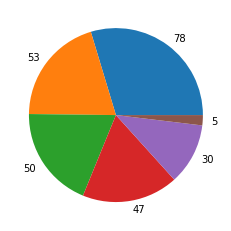

In [3]:
Rates = Books["My Rating"].value_counts()

plt.pie(Rates, labels = Rates)

plt.show()


# Extract Years

In [4]:
list(Books.columns)

#Books['Date Read'].dropna(axis=0)


Books = Books[Books['Date Read'].notna()]
Books[['Date Read']]

Books['Year'] = pd.to_datetime(Books['Date Read'],format='%YYYY%mm%dd', errors='coerce')

Books['Year'] = pd.DatetimeIndex(Books['Date Read']).year
Books[['Year', 'Date Read']]

,Year,Date Read
1,2021,2021/01/01
3,2017,2017/10/11
6,2021,2021/12/20
7,2021,2021/12/12
8,2021,2021/10/13
...,...,...
245,2013,2013/08/01
246,2013,2013/08/28
253,2013,2013/06/01
261,2013,2013/05/01


# Calculate mean rate per year

In [5]:
RateMeans = (Books["My Rating"].groupby(Books["Year"]).mean())
RateMeans
"""
barplot = sns.barplot(
    data=RateMeans, 
    x = "Year", 
    y = 'My Rating', 
    )
"""
Years = list(RateMeans.index.values)
Rates = list(RateMeans)
Years, Rates





RateMeans = pd.DataFrame(
    {'Years': Years,
     'Rates': Rates
    })
RateMeans

,Years,Rates
0,2005,5.000000
1,2007,4.000000
2,2008,2.000000
3,2009,4.166667
4,2010,2.333333
5,2011,3.125000
6,2012,3.333333
7,2013,3.833333
8,2014,3.800000
9,2015,4.400000


# Function to create a palette 

In [6]:
# Function

def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

# Example

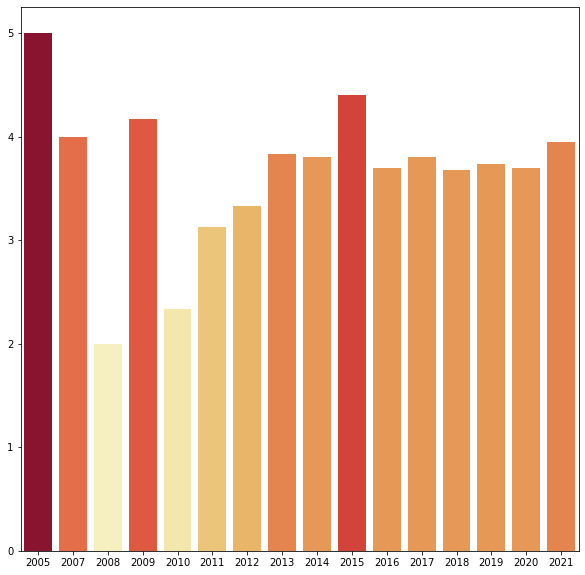

In [8]:
ArrayRates = RateMeans.to_numpy()
#ArrayRates = Rates.to_numpy()
ArrayRates
#ArrayRates[1:2:2]
fig,ax = plt.subplots(figsize=(10,10))

sns.barplot(Years, Rates, 
            palette=colors_from_values(ArrayRates[:,1]**2, "YlOrRd"))

#ArrayRates[:,1]

#RateMeans

#colors_from_values(ArrayRates[:,1]**2, "YlOrRd")

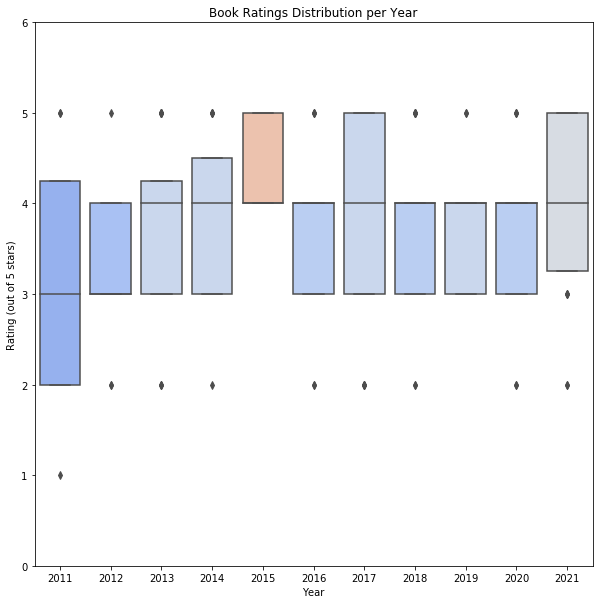

In [9]:
# Good source: https://www.youtube.com/watch?v=BE8CVGJuftI

fig,ax = plt.subplots(figsize=(10,10))


plot = sns.boxplot(
    data=Books, 
    x = "Year", 
    y = 'My Rating', 
    ax=ax,
    showfliers=True,
    whis=0, 
    palette=colors_from_values(ArrayRates[:,1]**3, "coolwarm")
    )
    
    
ax.set(xlim=(4.5, None),
       ylim=(0,6))

ax.set_title('Book Ratings Distribution per Year')
ax.set_ylabel('Rating (out of 5 stars)')

plt.show(plot)

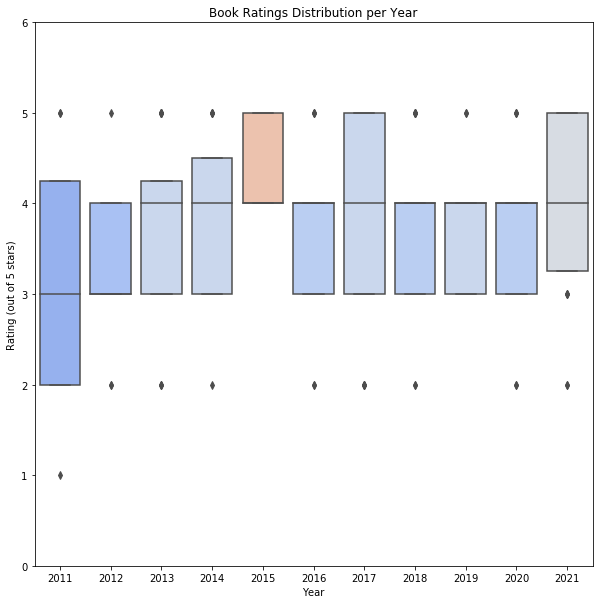

In [10]:
fig

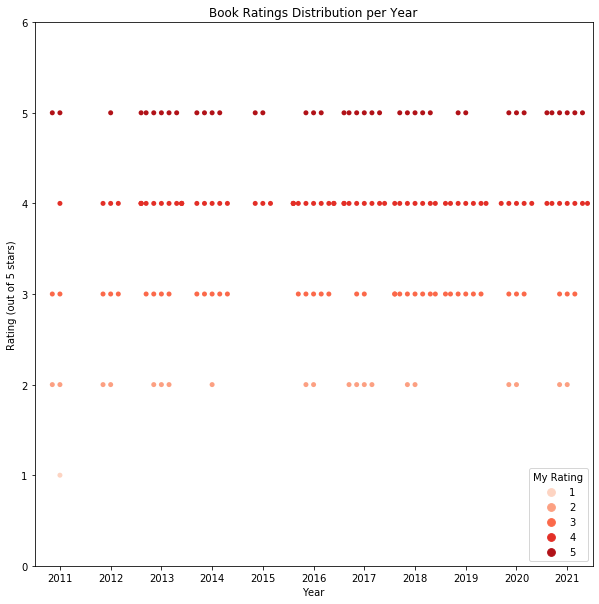

In [11]:
# Good source: https://www.youtube.com/watch?v=BE8CVGJuftI

fig,ax = plt.subplots(figsize=(10,10))


plot = sns.swarmplot(
    data=Books, 
    x = "Year", 
    y = 'My Rating', 
    ax=ax,
    hue = "My Rating",
    palette = "Reds"
    #palette=colors_from_values(ArrayRates[:,1], "Reds")
    )
    
    
ax.set(xlim=(4.5, None),
       ylim=(0,6))

ax.set_title('Book Ratings Distribution per Year')
ax.set_ylabel('Rating (out of 5 stars)')

plt.show(plot)

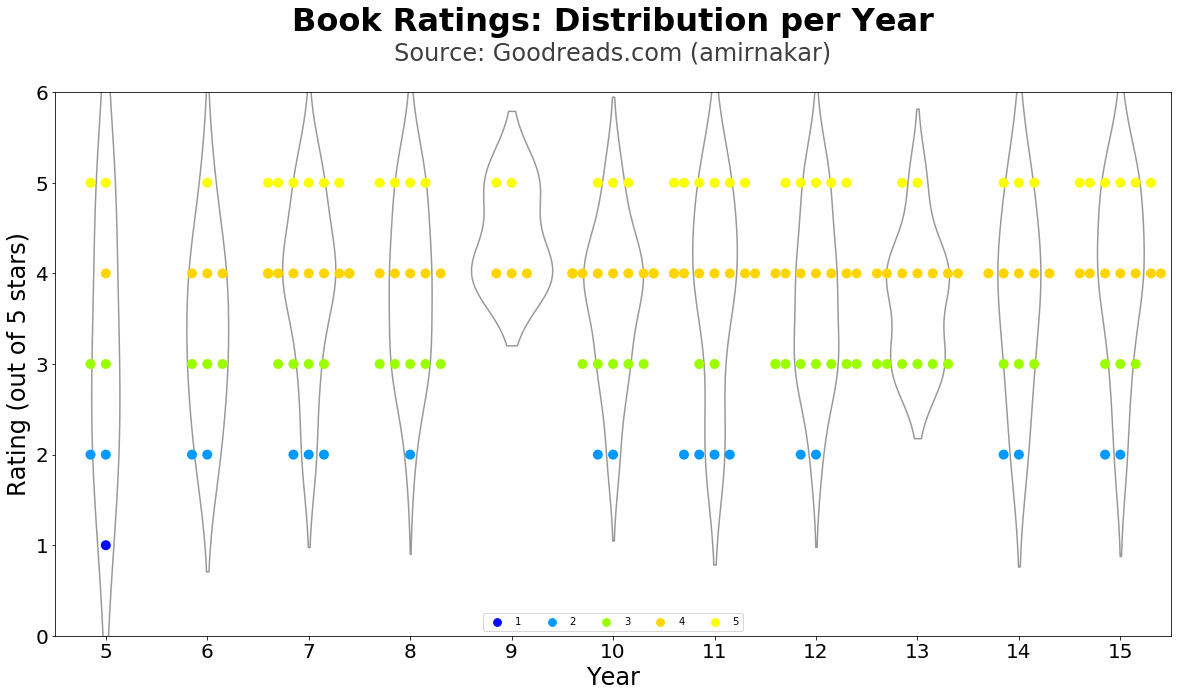

In [15]:
fig,ax = plt.subplots(figsize=(20,10))

# Violin Plot:
plot = sns.violinplot(
    data=Books, 
    x = "Year", 
    y = 'My Rating', 
    ax=ax,
    color = "white", 
    inner=None,
    #palette=colors_from_values(ArrayRates[:,1], "Blues")
    )

# Swarm Plot
plot = sns.swarmplot(
    data=Books, 
    x = "Year", 
    y = 'My Rating', 
    ax=ax,
    hue = "My Rating",
    size = 10
    )
    
# Style
    
## Title
ax.text(x=0.5, y=1.1, s='Book Ratings: Distribution per Year', fontsize=32, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Source: Goodreads.com (amirnakar)', fontsize=24, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)



## Axis
ax.set(xlim=(4.5, None), ylim=(0,6))
#ax.set_title('Book Ratings: Distribution per Year \n', fontsize = 32)
ax.set_ylabel('Rating (out of 5 stars)', fontsize = 24)
ax.set_xlabel('Year', fontsize = 24)
ax.set_yticklabels(ax.get_yticks().astype(int), size=20)
ax.set_xticklabels(ax.get_xticks(), size=20)

## Legend
plot.legend(loc="lower center", ncol = 5 )

## Colour pallete
colorset = ["#FAFF04", "#FFD500", "#9BFF00", "#0099FF", "#000BFF"]
colorset.reverse()
sns.set_palette(sns.color_palette(colorset))



#plt.show(plot)
plt.savefig("Rate-Python.svg", format="svg")

Text(0, 0.5, 'Rating (out of 5 stars)')

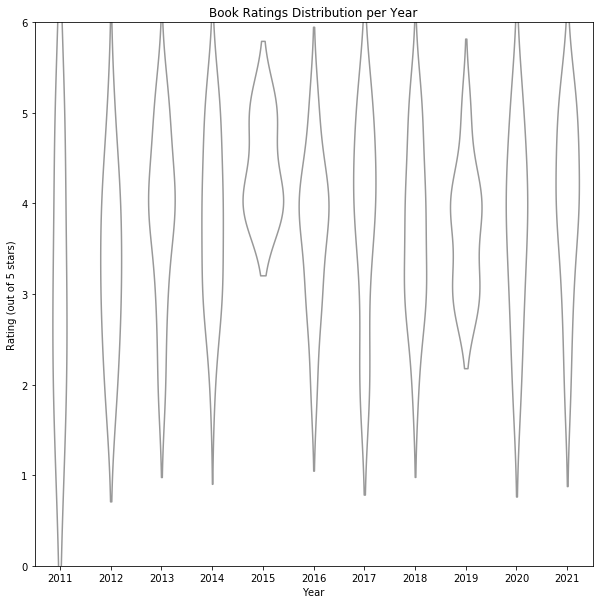

In [13]:
fig,ax = plt.subplots(figsize=(10,10))


plot = sns.violinplot(
    data=Books, 
    x = "Year", 
    y = 'My Rating', 
    ax=ax,
    color = "white", 
    inner=None,
    #palette=colors_from_values(ArrayRates[:,1], "Blues")
    )
    
    
ax.set(xlim=(4.5, None),
       ylim=(0,6))

ax.set_title('Book Ratings Distribution per Year')
ax.set_ylabel('Rating (out of 5 stars)')

['40', '20', '10', '0']